<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression using normal equation:**

In [0]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing

housing=fetch_california_housing()
m,n=housing.data.shape
housing_data_with_bias=np.c_[np.ones((m,1)),housing.data]
X=tf.constant(housing_data_with_bias,dtype=tf.float32, name='X')
y=tf.constant(housing.target.reshape(-1,1),dtype=tf.float32, name='y')
XT=tf.transpose(X)
Theta=tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

with tf.Session() as sess:
  Theta_val=Theta.eval()
  print(Theta_val)
print(housing.data[:2])

I0813 17:17:12.710201 139805498947456 california_housing.py:115] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /root/scikit_learn_data


[[-3.67372932e+01]
 [ 4.37366009e-01]
 [ 9.47520509e-03]
 [-1.08159676e-01]
 [ 6.48537397e-01]
 [-3.84734449e-06]
 [-3.79239232e-03]
 [-4.19136107e-01]
 [-4.32144403e-01]]
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]]


Linear Manual Parameter calculation

In [0]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing
from datetime import datetime
timenow=datetime.utcnow().strftime('%Y%m%d%H%M%S')
root_logdir="tf_logs"
logdir = "{}/run-{}/".format(root_logdir, timenow)

n_epochs=1000
learning_rate=0.01
housing=fetch_california_housing()
m,n=housing.data.shape
housing_data_with_bias=np.c_[np.ones((m,1)),housing.data/1000]
X=tf.constant(housing_data_with_bias,dtype=tf.float32, name='X')
y=tf.constant(housing.target.reshape(-1,1)/1000,dtype=tf.float32, name='y')
Theta=tf.Variable(tf.random_uniform([n+1,1],-1,1),dtype=tf.float32,name='Theta')
Predictions=tf.matmul(X,Theta)
diff=Predictions-y
mse=tf.reduce_mean(tf.square(diff))
#gradient=2/m*tf.matmul(tf.transpose(X),diff)
#gradient=tf.gradients(mse,Theta)[0]
#training_op=tf.assign(Theta,Theta-learning_rate*gradient)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(mse)
init=tf.global_variables_initializer()
saver=tf.train.Saver()

mse_summary=tf.summary.scalar('MSE',mse)
file_writer=tf.summary.FileWriter(logdir,tf.get_default_graph())

with tf.Session() as sess:
  init.run()
  for i in range(n_epochs):
    if(i%100==0):
      summary_str=mse_summary.eval()
      file_writer.add_summary(summary_str,i)
      print(i, mse.eval())
      print(Theta.eval())
      save_path=saver.save(sess,"/tmp/linear.ckpt")
    sess.run(training_op)
    
  best_theta = Theta.eval()
  
  save_path=saver.save(sess,"/tmp/final_linear.ckpt")
print(best_theta)


0 0.25982162
[[-0.78305244]
 [-0.97446036]
 [-0.23277044]
 [-0.79998374]
 [ 0.27064824]
 [ 0.42016125]
 [ 0.82027125]
 [ 0.23611593]
 [-0.09386396]]
100 0.068228856
[[-0.42545936]
 [-0.97307134]
 [-0.22006938]
 [-0.7979162 ]
 [ 0.27106178]
 [ 0.19698355]
 [ 0.8207257 ]
 [ 0.2490038 ]
 [-0.13674904]]
200 0.01853911
[[-0.22935297]
 [-0.9723045 ]
 [-0.21317562]
 [-0.79678166]
 [ 0.27128822]
 [ 0.10189413]
 [ 0.8209137 ]
 [ 0.25606367]
 [-0.16026166]]
300 0.0050850767
[[-0.12730767]
 [-0.9719003 ]
 [-0.20956884]
 [-0.79618645]
 [ 0.2714065 ]
 [ 0.05241979]
 [ 0.8209278 ]
 [ 0.25973496]
 [-0.17249537]]
400 0.0014422333
[[-0.07420906]
 [-0.97168475]
 [-0.20767255]
 [-0.7958718 ]
 [ 0.27146858]
 [ 0.02667612]
 [ 0.8208516 ]
 [ 0.26164305]
 [-0.17885989]]
500 0.0004558723
[[-0.04657968]
 [-0.9715673 ]
 [-0.20666629]
 [-0.795703  ]
 [ 0.27150136]
 [ 0.01328061]
 [ 0.82072824]
 [ 0.2626334 ]
 [-0.18217053]]
600 0.00018878117
[[-0.03220314]
 [-0.971501  ]
 [-0.2061231 ]
 [-0.79561013]
 [ 0.271518

**Running the linear regression with own data.**

0 8.51
100 0.0005696894
200 0.00056654547
300 0.00056410156
400 0.0005621983
500 0.00056071917
600 0.00055957405
700 0.00055867934
800 0.0005579835
900 0.00055744476
[[0.7212785 ]
 [0.14855936]]


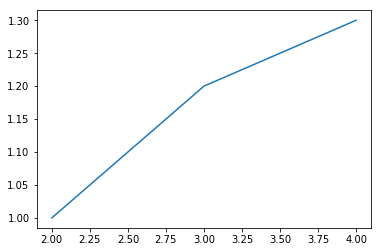

In [0]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt

n_epochs=1000
learning_rate=0.01
housing=fetch_california_housing()
m=3
n=1
c=[[2],[3],[4]]
d=[[1],[1.2],[1.3]]
plt.plot(c,d)
housing_data_with_bias=np.c_[np.ones((m,1)),c]
X=tf.constant(housing_data_with_bias,dtype=tf.float32, name='X')
y=tf.constant(d,dtype=tf.float32, name='y')
Theta=tf.Variable(tf.random_uniform([n+1,1],1,1),dtype=tf.float32,name='Theta')
Predictions=tf.matmul(X,Theta)
diff=Predictions-y
mse=tf.reduce_mean(tf.square(diff))
#gradient=2/m*tf.matmul(tf.transpose(X),diff)
#gradient=tf.gradients(mse,Theta)[0]
#training_op=tf.assign(Theta,Theta-learning_rate*gradient)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(mse)

init=tf.global_variables_initializer()

with tf.Session() as sess:
  init.run()
  for i in range(n_epochs):
    if(i%100==0):
      print(i, mse.eval())
    sess.run(training_op)
  best_theta = Theta.eval()
print(best_theta)

**Calculating the predictions using best theta**

[[0.7212785 ]
 [0.14855936]]
[[1.09267689]
 [1.24123625]]
[[2.5], [3.5], [2], [3], [4]]
[[1.092676892876625], [1.2412362545728683], [1], [1.2], [1.3]]


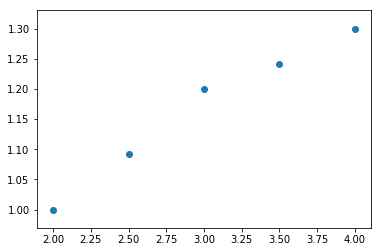

In [0]:
print(best_theta)
a=[[2.5],[3.5]]
a1=np.c_[np.ones((2,1)),a]
z=np.matmul(a1,best_theta)
print(z)
a=a+c
print(a)
z=np.ndarray.tolist(z)
z=z+d
print(z)
plt.scatter(a,z)

In [20]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [23]:
%tensorboard --logdir /content/tf_logs/

In [0]:
!kill 388

In [0]:
cd /content

/content
